**AFRICAN NAMES**

Let's start! But first, an important note. All the results of this notebook result only from the analysis of this database. In order to attest to the information contained herein, confirmation is necessary through people with expertise in the subject, such as historians, anthropologists, linguists, etc.

First, let's import the packages:

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-colorblind')

Loading the file:

In [3]:
file = pd.read_csv('/home/fabi/Desktop/datasets/slave_trade/AfricanNamesDatabase.csv')

Ready! Now we can start to explore the database, using a very basic command:

In [4]:
file.head()

,ID,Voyage ID,Name,Sexage,Age,Height (in),Ship name,Arrival,Disembarkation,Embarkation,Country of Origin
0,1,2314,Bora,Man,30,62.5,NS de Regla,1819,Freetown,Little Bassa,
1,2,2315,Flam,Man,30,64,Fabiana,1819,Freetown,Trade Town,
2,3,2315,Dee,Man,28,65,Fabiana,1819,Freetown,Trade Town,
3,4,2315,Pao,Man,22,62.5,Fabiana,1819,Freetown,Trade Town,Crue
4,5,2315,Mufa,Man,16,59,Fabiana,1819,Freetown,Trade Town,Crue


We can see that some data is blank, as in the *Country of Origin* column. We will have to take care of that. But first, let's explore a little more:

Here we have some more useful information, such as the amount of data in each column. However, as we saw above, we must suspect that this information can lead us astray, because blank data is also counted. In fact, we will have to replace this blank data with something else that Python understands as missing data. Calm down, then we'll understand better.

Another issue is that it will be important to change the data type from object to category. (Learn more about the advantages of this procedure at this link: https://pbpython.com/pandas_dtypes_cat.html - just read "Introduction" and "Pandas Category Data Type").

Proceeding:

In [5]:
file.describe()

,ID,Voyage ID,Arrival
count,91490.000000,91490.000000,91490.000000
mean,62122.019762,17698.248792,1831.402383
std,51305.069417,82016.880136,9.524704
min,1.000000,557.000000,1808.000000
25%,22935.250000,2443.000000,1826.000000
50%,45822.500000,2871.000000,1832.000000
75%,101263.750000,3601.000000,1837.000000
max,199932.000000,500082.000000,1862.000000


This method works on numerical data. And here we discovered another data type change that will need to do. The *Age* and *Height (in)* columns are also numeric data, but are listed as object. So they are not appearing in the output. We will leave the analysis of this data for when we make the change.

In [6]:
file.columns

Index(['ID', 'Voyage ID', 'Name', 'Sexage', 'Age', 'Height (in)', 'Ship name',
       'Arrival', 'Disembarkation', 'Embarkation', 'Country of Origin'],
      dtype='object')

Above are the column names. Now, let's know the size of the database:

In [7]:
file.shape

(91490, 11)

There are 91,490 rows (people) and 11 columns.

According to what we've seen so far, we'll now carry out some changes. First, let's replace the empty spaces with *np.nan*. So we supply the neccesity to make Python recognize them as missing, blank data.

In [8]:
file = file.replace(' ', np.nan)

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91490 entries, 0 to 91489
Data columns (total 11 columns):
ID                   91490 non-null int64
Voyage ID            91490 non-null int64
Name                 91490 non-null object
Sexage               78612 non-null object
Age                  90364 non-null object
Height (in)          86670 non-null object
Ship name            91489 non-null object
Arrival              91490 non-null int64
Disembarkation       91490 non-null object
Embarkation          90364 non-null object
Country of Origin    12086 non-null object
dtypes: int64(3), object(8)
memory usage: 7.7+ MB


There have been changes from what we saw earlier, especially in the *Country of Origin* column. Everything indicates that the evaluation of information on this column will be the most affected. However, this is the reality of this database and demonstrating this is very important.

Well, such blank data, despite being lost, is data. So I decided to name them as such so that this information appears explicitly. Obviously, I could have done this before, instead of using *np.nan*, but I didn't have such an accurate notion of this missing data. We will now make these substitutions.

Note that we need to make these changes to columns in which there is less data than the total (<91,490). The first column in this situation is *Sexage*.

In [10]:
file.Sexage = file.Sexage.replace(np.nan, 'unknown')

The next column I needed to work on was *Age*. However, obviously, I cannot substitute for "unknown", because they're numerical data. So, in addition to taking advantage of the occasion and changing the data type from object to float, I decided to fill in the empty data with the average age of the entire database.

In [11]:
file.Age = pd.to_numeric(file.Age, downcast='float')
file.Age = file.Age.fillna(file.Age.mean())

I took the same decision regarding *Height (in)*.

In [12]:
file['Height (in)'] = pd.to_numeric(file['Height (in)'], downcast='float')
file['Height (in)'] = file['Height (in)'].fillna(file['Height (in)'].mean())

*Ship name*, *Embarkation* e *Country of Origin* are in the same situation. So:

In [13]:
file['Ship name'] = file['Ship name'].replace(np.nan, 'unknown')

file.Embarkation = file.Embarkation.replace(np.nan, 'unknown')

file['Country of Origin'] = file['Country of Origin'].replace(
        np.nan, 'unknown')

The last thing to do is transforming the other data that stays like object. They're nominal categorical, so I decided to transform them in *category*. For that, I used a *for loop*:

In [14]:
for col in file.columns:
    if file[col].dtype == np.object:
        file[col] = file[col].astype('category') 

Ready! Now I can analyze the data with the made transformations and to try some initial interpretations:

In [15]:
file.head()

,ID,Voyage ID,Name,Sexage,Age,Height (in),Ship name,Arrival,Disembarkation,Embarkation,Country of Origin
0,1,2314,Bora,Man,30.0,62.5,NS de Regla,1819,Freetown,Little Bassa,unknown
1,2,2315,Flam,Man,30.0,64.0,Fabiana,1819,Freetown,Trade Town,unknown
2,3,2315,Dee,Man,28.0,65.0,Fabiana,1819,Freetown,Trade Town,unknown
3,4,2315,Pao,Man,22.0,62.5,Fabiana,1819,Freetown,Trade Town,Crue
4,5,2315,Mufa,Man,16.0,59.0,Fabiana,1819,Freetown,Trade Town,Crue


We can see that instead of to be blank, the data were filled with "unknown". Proceeding:

In [16]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91490 entries, 0 to 91489
Data columns (total 11 columns):
ID                   91490 non-null int64
Voyage ID            91490 non-null int64
Name                 91490 non-null category
Sexage               91490 non-null category
Age                  91490 non-null float32
Height (in)          91490 non-null float32
Ship name            91490 non-null category
Arrival              91490 non-null int64
Disembarkation       91490 non-null category
Embarkation          91490 non-null category
Country of Origin    91490 non-null category
dtypes: category(6), float32(2), int64(3)
memory usage: 6.8 MB


In addition to not having any missing data, we can see now that there isn't no one data like *object* anymore. 

In [17]:
file.describe()

,ID,Voyage ID,Age,Height (in),Arrival
count,91490.000000,91490.000000,91490.000000,91490.000000,91490.000000
mean,62122.019762,17698.248792,18.889534,58.600918,1831.402383
std,51305.069417,82016.880136,8.549236,6.660805,9.524704
min,1.000000,557.000000,0.500000,0.000000,1808.000000
25%,22935.250000,2443.000000,11.000000,54.000000,1826.000000
50%,45822.500000,2871.000000,19.000000,59.000000,1832.000000
75%,101263.750000,3601.000000,26.000000,64.000000,1837.000000
max,199932.000000,500082.000000,77.000000,85.000000,1862.000000


Now all numerical data are discriminated. On this work, I'll use just *Age* and *Arrival*. So I'll focus the analysis just on these columns. 

We can see that the age mean is 18,89 years old. Like we hoped, the majority of embarkations were compounded by youngers. But we can verify that the data show that there were babies on embarkations (see the min, that is 0,5 years old) and elders (max 77 years old). Another alarming data is that 1 in 4 people (25%) were children. 

About *Arrival*, we verify that, as the mean is 1831, in this period that happened the majority of rescues. Also, the database shows records from 1808 to 1862. 

IT'S TIME TO PLOT! I started with *Disembatkation* column, that shows the places from where the rescued people disembarked. Let's to the step-by-step.

In [18]:
disemb0 = file.Disembarkation.value_counts()
disemb0

Freetown               81009
Havana                 10058
Bahamas unspecified      183
Kingston, Jamaica        144
St. Helena                96
Name: Disembarkation, dtype: int64

After separating *Disembarkation* column, we can verify that the vast majority of people cataloged in this database disembarked in Freetown, in Serra Leoa (get to know about History and other characteristics about the city here: https://en.wikipedia.org/wiki/Freetown). Less people disembarked in St.Helena (https://en.wikipedia.org/wiki/Saint_Helena). 

In [19]:
disemb1 = pd.Series(disemb0[:2])
disemb2 = {'Bahamas, Jamaica and St. Helena': sum(disemb0[2:])}
disemb2 = pd.Series(disemb2, index=['Bahamas, Jamaica and St. Helena'])
disemb = pd.concat((disemb2, disemb1))
disemb

Bahamas, Jamaica and St. Helena      423
Freetown                           81009
Havana                             10058
dtype: int64

On the code above, as the quantity of disembarked people in Bahamas, Jamaica and St. Helena is small, I decided to unite them to optimize the plot. 

In [20]:
disemb_d = dict(disemb.sort_values(ascending=False))
disemb_dkeys, disemb_dvalues = zip(*disemb_d.items())

I transformed it into a dictionary and then I "separated" the keys and values to be able to work them in the plot, which follows:

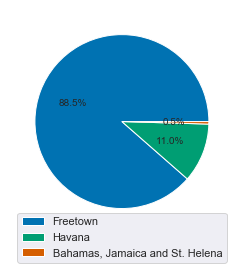

Freetown               81009
Havana                 10058
Bahamas unspecified      183
Kingston, Jamaica        144
St. Helena                96
Name: Disembarkation, dtype: int64


In [21]:
fig, ax = plt.subplots()
ax.pie(disemb_dvalues, autopct='%1.1f%%')
fig.legend(disemb_dkeys, loc=8)
plt.show()
print(disemb0)

Now looking at percentages, we can see how the vast majority of people landed in Freetown (88.5%) and a small slice in Bahamas, Jamaica and St. Helena (0.5%).

Let's look at the Embarkation column, which shows where the rescued people embarked from.

In [22]:
file = file.replace({'Old Calabar': 'Velha Calabar'})
emb0 = file.Embarkation.value_counts()
emb0

Lagos                              15730
Bonny                              14449
Ouidah                              8306
Velha Calabar                       7192
Gallinhas                           4522
Bight of Benin unspecified          3958
Rio Pongo                           2922
Badagry                             2729
Cameroons River                     2165
Sierra Leone unspecified            2091
Loango                              1926
Bight of Biafra unspecified         1856
Rio Brass                           1603
Popo                                1542
Sherbro                             1422
Rio Nun                             1405
New Calabar                         1324
Freetown                            1167
unknown                             1126
Cabinda                             1124
Ambriz                              1101
Bimbia                               892
Cameroons, unspecified               862
Congo North                          715
Bissau          

We check here all 60 locations in descending order according to the number of people on board. We can see that the places of departure for 1126 people are unknown.

As it's not feasible to plot all 60 locations, I decided to separate the 5 locations with the highest values and define the rest as "others".

In [23]:
emb1 = pd.Series(emb0[:5])
emb2 = {'others': sum(emb0[5:])}
emb2 = pd.Series(emb2, index=['others'])
emb = pd.concat((emb2, emb1))

And then do the transformation with dictionaries and plot:

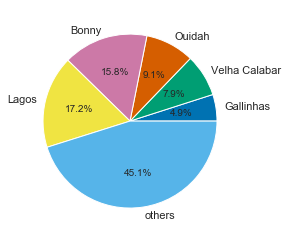

others           41291
Lagos            15730
Bonny            14449
Ouidah            8306
Velha Calabar     7192
Gallinhas         4522
dtype: int64


In [24]:
emb_d = dict(emb.sort_values())
emb_dkeys, emb_dvalues = zip(*emb_d.items())

fig, ax = plt.subplots()
ax.pie(emb_dvalues, labels=emb_dkeys, autopct='%1.1f%%')

plt.show()   

print(emb)

As we can see, the largest number of embarkations occurred in Lagos (15,730 - 17.2% of shipments).

Take advantage of the occasion and find out about the "Door of No Return" in Ouidah: https://en.wikipedia.org/wiki/Door_of_No_Return,_Ouidah. 

The next plot shows the distribution of the number of rescues in the database registration period (from 1808 to 1862). Plotting to understand better.

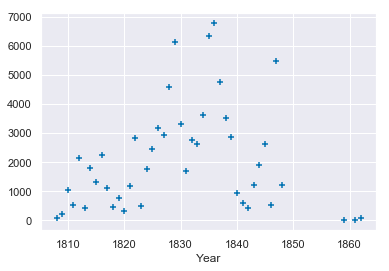

In [25]:
arrival = pd.DataFrame(file.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrival = arrival.rename(columns={'index': 'Year', 'Arrival': 
    'Rescued people'})
    
fig, ax = plt.subplots()    
ax.scatter(x='Year', y='Rescued people', data=arrival, marker='+')
ax.set_xlabel('Year')

plt.show()

Each point on the graph (+) corresponds to the number of people rescued per year. We can see that after the middle of 1820, the number of people rescued jumped, decreasing from the second half of the 1840s.

The plot below shows the origin of the rescued people. Apparently, it's not only a matter of geographical origin, but also ethnic origin (in addition to subgroups). How many geographic or ethnic groups does the database have? Let's check next.

In [26]:
origin0a = file['Country of Origin'].value_counts()
origin0a.shape

(564,)

As it is impossible to plot 564 ethnic or geographical origins, see how I decided to do:

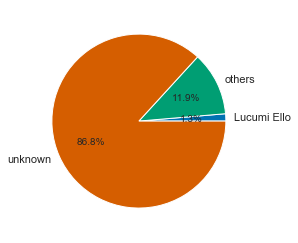

unknown             79404
Lucumi Ello          1235
Congo                1172
Eboo, Hebo            762
Lucumi                582
Carabali Suamo        490
Mandinga              474
Lucumi Ecumacho       470
Ganga                 465
Carabali Camaron      396
Congo Mondongo        362
Name: Country of Origin, dtype: int64


In [27]:
origin1a = pd.Series(origin0a[:2])
origin2a = {'others': sum(origin0a[2:])}
origin2a = pd.Series(origin2a, index=['others'])
origina = pd.concat((origin2a, origin1a))

origina_d = dict(origina.sort_values())
origina_dkeys, origina_dvalues = zip(*origina_d.items())

fig, ax = plt.subplots()
ax.pie(origina_dvalues, labels=origina_dkeys, autopct='%1.1f%%')
plt.show()

print(origin0a.head(11))

We found that most of the records we call "origin" are unknown. *Lucumi Ello* has the most mentions, with only 1.3%. Despite this, it's interesting to explore the other records. So I decided to remove the unknown data and analyze the known ones, like this:

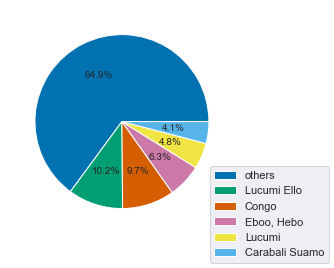

others            7845
Lucumi Ello       1235
Congo             1172
Eboo, Hebo         762
Lucumi             582
Carabali Suamo     490
dtype: int64


In [28]:
origin0b = origin0a.iloc[1:] #removing unknown data

origin1b = pd.Series(origin0b[:5])
origin2b = {'others': sum(origin0b[5:])}
origin2b = pd.Series(origin2b, index=['others'])
originb = pd.concat((origin2b, origin1b))

originb_d = dict(originb.sort_values(ascending=False))
originb_dkeys, originb_dvalues = zip(*originb_d.items())

fig, ax = plt.subplots()
ax.pie(originb_dvalues, autopct='%1.1f%%')
fig.legend(originb_dkeys, loc=4)
plt.show()

print(originb)

The next plot tells us about the people's gender on board. Now, we have the following information:

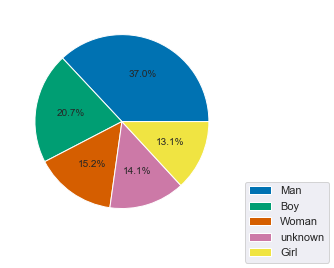

Man        33827
Boy        18896
Woman      13870
unknown    12878
Girl       12019
Name: Sexage, dtype: int64


In [29]:
sexage = file.Sexage.value_counts()
sexage_d = dict(sexage)
sexage_dkeys, sexage_dvalues = zip(*sexage_d.items())

fig, ax = plt.subplots()
ax.pie(sexage_dvalues, autopct='%1.1f%%')
fig.legend(sexage_dkeys, loc=4)
plt.show()

print(sexage)

We found that the majority of people on board were male, with 37% men and 20.7% boys. And 14.1% of the genders are unknown. It would be interesting to know through data analysis which method to define men, women, boys and girls. I encourage you to do this! =)

Now let's get to know the age group of people on the embarkations.

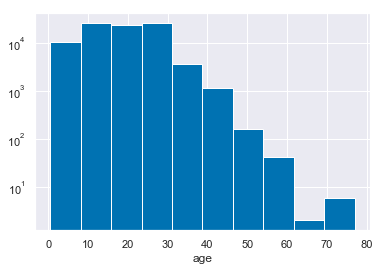

count    91490.000000
mean        18.889534
std          8.549236
min          0.500000
25%         11.000000
50%         19.000000
75%         26.000000
max         77.000000
Name: Age, dtype: float64

In [30]:
age = file.Age
fig, ax = plt.subplots()    
ax.hist(age, log=True)
ax.set_xlabel('age')
plt.show()

age.describe()

As we have already seen, the histogram above shows that the ships were mostly composed of young people. We also confirmed that there were many children and even babies, as well as elderly people on these ships. = (

The database also provides the names of the ships. As we will see below, 444 different ships have been registered (some of them are intercepted more than once).

In [31]:
ship0 = file['Ship name'].value_counts()
ship0.shape

(444,)

Now let's know some names:

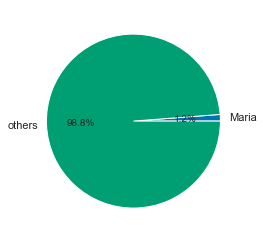

Maria        1116
Carolina     1089
Emilia        886
Esperança     860
Vingador      845
Name: Ship name, dtype: int64


In [32]:
ship1 = pd.Series(ship0[:1])
ship2 = {'others': sum(ship0[1:])}
ship2 = pd.Series(ship2, index=['others'])
ship = pd.concat((ship2, ship1))

ship_d = dict(ship.sort_values())
ship_dkeys, ship_dvalues = zip(*ship_d.items())

fig, ax = plt.subplots()
ax.pie(ship_dvalues, labels=ship_dkeys, autopct='%1.1f%%')
plt.show()

print(ship0.head())

As we expected, it's impossible to plot all ships. Let's select the 10 ships that most transported people:

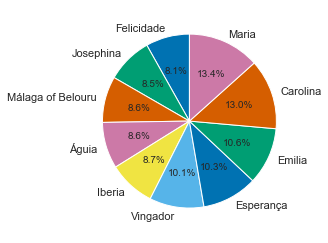

Maria                1116
Carolina             1089
Emilia                886
Esperança             860
Vingador              845
Iberia                726
Águia                 720
Málaga of Belouru     716
Josephina             712
Felicidade            680
Name: Ship name, dtype: int64


In [33]:
shipb = ship0.head(10)
shipb_d = dict(shipb.sort_values())
shipb_dkeys, shipb_dvalues = zip(*shipb_d.items())

shipb = ship0.head(10)
shipb_d = dict(shipb.sort_values())
shipb_dkeys, shipb_dvalues = zip(*shipb_d.items())

fig, ax = plt.subplots()
ax.pie(shipb_dvalues, labels=shipb_dkeys, autopct='%1.1f%%', startangle=90)
plt.show()

print(shipb)

Out of curiosity, let's get to know the ships with the least people rescued:

In [34]:
print('The 30 least occupied ships:')
print()
print(ship0[-30:])

The 30 least occupied ships:

Unidentified (Group 40)                          6
Linda Africano                                   5
Africans escaped to the colony for protection    5
Unidentified (Group 32)                          4
Emprendador                                      3
Seized in the colony                             3
HMS Hecate                                       3
Tres Amigos                                      3
Landed from HMS Favourite                        3
Two Cousins                                      3
Eliza Davidson                                   2
Rapido                                           2
Santana de Africa                                2
Seized in the Gambia by Capt Finlay              2
Feliz Victoria                                   2
Nymfa do Mar                                     2
Novo Abismo                                      1
HMCS Charlotte                                   1
Seized on board the John                         1
S

A sad curiosity: one of the ships has my name. It was a very sad day that I detected this. = (

In total, 131 people were rescued from that ship.

In [35]:
fabiana = file[file['Ship name'] == 'Fabiana']
fabiana.shape

(131, 11)

We also found that 118 people boarded the ship in Bonny and 13 in Trade Town.

In [36]:
fabiana.Embarkation.value_counts()

Bonny         118
Trade Town     13
Name: Embarkation, dtype: int64

Everyone on the ship in question disembarked in Freetown, as we will see below.

In [37]:
fabiana.Disembarkation.value_counts()

Freetown               131
St. Helena               0
Kingston, Jamaica        0
Havana                   0
Bahamas unspecified      0
Name: Disembarkation, dtype: int64

Finally, we now see that in the year 1819, 13 people were rescued from this ship. In 1823: 118.

In [38]:
fabiana.Arrival.value_counts()

1823    118
1819     13
Name: Arrival, dtype: int64

After analyzing some general characteristics, we'll now analyze the data of people landed by location, that is: Freetown, Havana, Bahamas, Kingston (Jamaica) and St. Helena.

**Freetown**

First, let's look at the geographic or ethnic origin of the people who landed in Freetown. The codes used from now on are very similar to the ones we used so far.

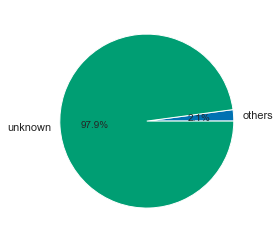

others      1707
unknown    79302
dtype: int64


In [39]:
disemb_ft = file[file.Disembarkation == 'Freetown'] # separating Freetown data
originfta0 = disemb_ft['Country of Origin'].value_counts()
originfta0.shape

originfta1 = pd.Series(originfta0[:1])
originfta2 = {'others': sum(originfta0[1:])}
originfta2 = pd.Series(originfta2, index=['others'])
originfta = pd.concat((originfta2, originfta1))

originfta_d = dict(originfta.sort_values())
originfta_d = {x:y for x, y in originfta_d.items() if y != 0} 
originfta_dkeys, originfta_dvalues = zip(*originfta_d.items())

fig, ax = plt.subplots()
ax.pie(originfta_dvalues, labels=originfta_dkeys, autopct='%1.1f%%')
plt.show()

print(originfta)

We found that only 2.4% of the people who landed in Freetown have a known geographical or ethnic origin. Despite being very little, it's worth analyzing the known data.

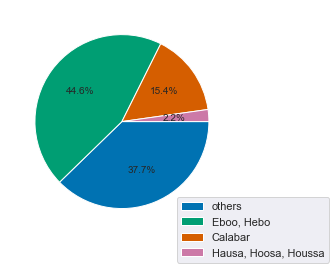

others                  644
Eboo, Hebo              762
Calabar                 263
Hausa, Hoosa, Houssa     38
dtype: int64


In [40]:
originftb0 = originfta0.iloc[1:]
originftb0.shape

originftb1 = pd.Series(originftb0[:3])
originftb2 = {'others': sum(originftb0[3:])}
originftb2 = pd.Series(originftb2, index=['others'])
originftb = pd.concat((originftb2, originftb1))

originftb_d = dict(originftb)
originftb_d = {x:y for x, y in originftb_d.items() if y != 0} 
originftb_dkeys, originftb_dvalues = zip(*originftb_d.items())

fig, ax = plt.subplots()
ax.pie(originftb_dvalues, autopct='%1.1f%%', counterclock=False)
fig.legend(originftb_dkeys, loc=4)
plt.show()

print(originftb)

Now let's get to know the people's gender data who landed at Freetown.

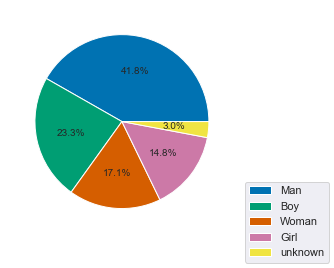

Man        33827
Boy        18896
Woman      13870
Girl       12019
unknown     2397
Name: Sexage, dtype: int64


In [41]:
sexage_ft = disemb_ft.Sexage.value_counts()
sexageft_d = dict(sexage_ft)
sexageft_dkeys, sexageft_dvalues = zip(*sexageft_d.items())

fig, ax = plt.subplots()
ax.pie(sexageft_dvalues, autopct='%1.1f%%')
fig.legend(sexageft_dkeys, loc=4)
plt.show()

print(sexage_ft)

Now the age group:

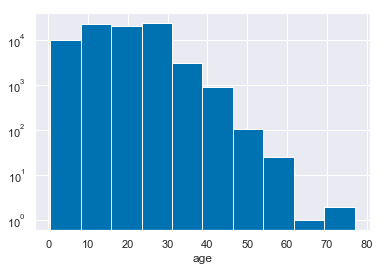

count    81009.000000
mean        18.835859
std          8.520610
min          0.500000
25%         11.000000
50%         20.000000
75%         26.000000
max         77.000000
Name: Age, dtype: float64

In [43]:
age_ft = disemb_ft.Age
fig, ax = plt.subplots()    
ax.hist(age_ft, log=True)
ax.set_xlabel('age')
plt.show()

age_ft.describe()

Now let's look at the total landings per year from the general data (+) compared to landings in Freetown, like this:

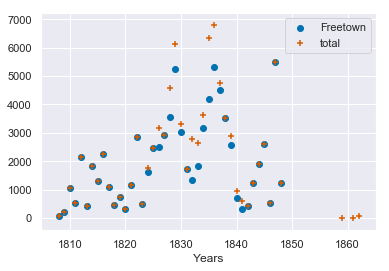

In [44]:
arrivalft = pd.DataFrame(disemb_ft.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalft = arrivalft.rename(columns={'index': 'Year', 'Arrival': 
    'Rescued people'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Year', y='Rescued people', data=arrivalft)  
ax.scatter(x='Year', y='Rescued people', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Years')
ax.legend(labels=['Freetown', 'total'])

plt.show()

So far and as expected, Freetown data and general data have little variation because the vast majority of records come from there. However, in this plot, we verified some relevant information. One is that the rescues that took place around 1860 certainly didn't take place in Freetown. Until the mid-1820s, there're only records at Freetown. After that, until around the beginning of the 1840s, there're records of landings in other places. Let's find out where they are from in the course of analyzing data.

Finally, let's look at one last feature of Freetown: the places from which people boarded and the quantity.

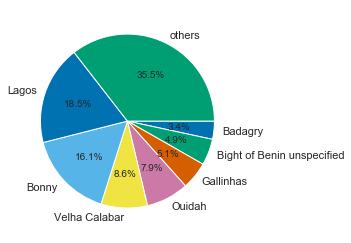

others                        28765
Lagos                         14947
Bonny                         13067
Velha Calabar                  6981
Ouidah                         6415
Gallinhas                      4147
Bight of Benin unspecified     3958
Badagry                        2729
dtype: int64


In [45]:
embft0 = disemb_ft['Embarkation'].value_counts()
embft0.shape

embft1 = pd.Series(embft0[:7])
embft2 = {'others': sum(embft0[7:])}
embft2 = pd.Series(embft2, index=['others'])
embft = pd.concat((embft2, embft1))

embft_d = dict(embft.sort_values())
embft_dkeys, embft_dvalues = zip(*embft_d.items())

fig, ax = plt.subplots()
ax.pie(embft_dvalues, labels=embft_dkeys, autopct='%1.1f%%', 
       counterclock=False)

plt.show()

print(embft)

We see here that, from people who landed in Freetown, most of them came from Lagos: 14,947 people. Followed by Bonny, Old Calabar and so on.

**Havana**

We're now going to analyze data from landed in Havana.

Following the order, we'll know the rescued people's ethnic or geographical origin.

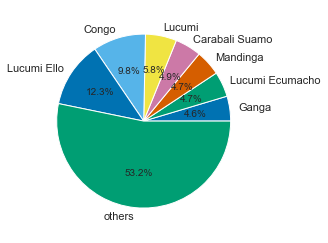

others             5353
Lucumi Ello        1235
Congo               989
Lucumi              582
Carabali Suamo      490
Mandinga            474
Lucumi Ecumacho     470
Ganga               465
dtype: int64


In [46]:
disemb_hv = file[file.Disembarkation == 'Havana']
originhv0 = disemb_hv['Country of Origin'].value_counts()
originhv0.shape

originhv1 = pd.Series(originhv0[:7])
originhv2 = {'others': sum(originhv0[7:])}
originhv2 = pd.Series(originhv2, index=['others'])
originhv = pd.concat((originhv2, originhv1))

originhv_d = dict(originhv.sort_values())
originhv_d = {x:y for x, y in originhv_d.items() if y != 0} 
originhv_dkeys, originhv_dvalues = zip(*originhv_d.items())

fig, ax = plt.subplots()
ax.pie(originhv_dvalues, labels=originhv_dkeys, autopct='%1.1f%%')
plt.show()

print(originhv)

We found that, as was common on the ships, rescued people had several origins. In the case of Havana, most of them were *Lucumi Ello*, with 1,235 people. Another interesting piece of information is that, as we mentioned before, there're ethnic subgroups, for example, in addition to the *Lucumi Ello*, there was also *Lucumi Ecumacho*.

Next, the people's gender who landed in Havana.

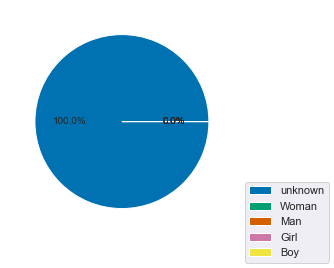

unknown    10058
Woman          0
Man            0
Girl           0
Boy            0
Name: Sexage, dtype: int64


In [47]:
sexage_hv = disemb_hv.Sexage.value_counts()
sexagehv_d = dict(sexage_hv)
sexagehv_dkeys, sexagehv_dvalues = zip(*sexagehv_d.items())

fig, ax = plt.subplots()
ax.pie(sexagehv_dvalues, autopct='%1.1f%%')
fig.legend(sexagehv_dkeys, loc=4)
plt.show()

print(sexage_hv)

We find that, unfortunately, all data relating to gender in Havana are unknown.

Another graph, this time indicating the age group.

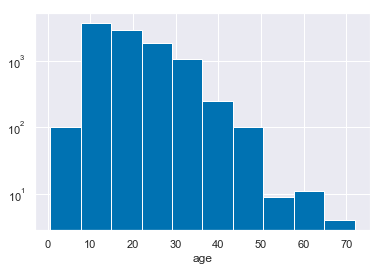

count    10058.000000
mean        19.296234
std          8.764830
min          0.600000
25%         12.000000
50%         18.000000
75%         25.000000
max         72.000000
Name: Age, dtype: float64

In [48]:
age_hv = disemb_hv.Age
fig, ax = plt.subplots()    
ax.hist(age_hv, log=True)
ax.set_xlabel('age')
plt.show()

age_hv.describe()

The average age of those rescued people in Havana is slightly higher than the general. Even so, there's a tendency to have many children on the boats, and also elderly people.

Now, another graph that shows the number of people rescued per year in Havana compared to the general.

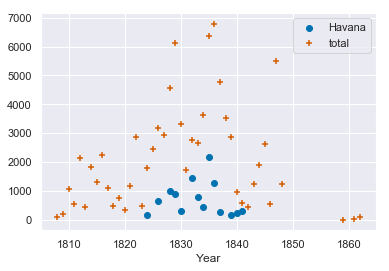

In [49]:
arrivalhv = pd.DataFrame(disemb_hv.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalhv = arrivalhv.rename(columns={'index': 'Year', 'Arrival': 
    'Rescued people'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Year', y='Rescued people', data=arrivalhv)  
ax.scatter(x='Year', y='Rescued people', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Year')
ax.legend(labels=['Havana', 'total'])

plt.show() 

We found that the rescued people from Havana are concentrated in the period from just before the middle of the 1820s to the beginning of the 1840s. Also, in this period, it's the largest period of rescues that the database records.

We'll now know data showing the most frequent embarkation places of those who disembarked in Havana.

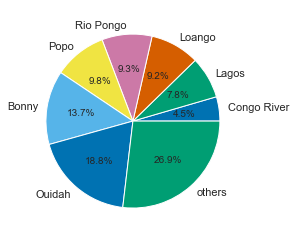

others         2702
Ouidah         1891
Bonny          1382
Popo            988
Rio Pongo       936
Loango          922
Lagos           783
Congo River     454
dtype: int64


In [50]:
embhv0 = disemb_hv['Embarkation'].value_counts()

embhv1 = pd.Series(embhv0[:7])
embhv2 = {'others': sum(embhv0[7:])}
embhv2 = pd.Series(embhv2, index=['others'])
embhv = pd.concat((embhv2, embhv1))

embhv_d = dict(embhv.sort_values())
embhv_dkeys, embhv_dvalues = zip(*embhv_d.items())

fig, ax = plt.subplots()
ax.pie(embhv_dvalues, labels=embhv_dkeys, autopct='%1.1f%%')
plt.show()
   
print(embhv)

Most embarked on Ouidah, followed by Bonny and Popo.

**Bahamas**

We'll now know the data about people landed in Bahamas, starting with the ethnic or geographical origin.

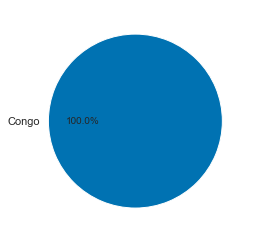

others             0
Congo            183
unknown            0
Congo Cumi         0
Congo Decolo       0
Congo Danval       0
Congo Damba        0
Congo Cutuide      0
Congo Cusa         0
Congo Cuno         0
Congo Cuma         0
dtype: int64


In [51]:
disemb_bh = file[file.Disembarkation == 'Bahamas unspecified']
originbh0 = disemb_bh['Country of Origin'].value_counts()

originbh1 = pd.Series(originbh0[:10])
originbh2 = {'others': sum(originbh0[10:])}
originbh2 = pd.Series(originbh2, index=['others'])
originbh = pd.concat((originbh2, originbh1))

originbh_d = dict(originbh)
originbh_d = {x:y for x, y in originbh_d.items() if y != 0} 
originbh_dkeys, originbh_dvalues = zip(*originbh_d.items())

fig, ax = plt.subplots()
ax.pie(originbh_dvalues, labels=originbh_dkeys, autopct='%1.1f%%')
plt.show()

print(originbh)

Absolutely all people landed in the Bahamas are from Congo (obviously, in the records in this database). Let's see about the gender.

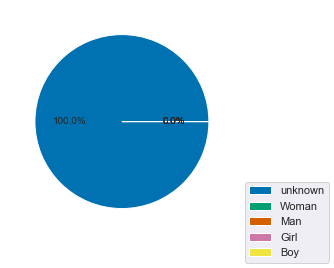

unknown    183
Woman        0
Man          0
Girl         0
Boy          0
Name: Sexage, dtype: int64


In [52]:
sexage_bh = disemb_bh.Sexage.value_counts()
sexagebh_d = dict(sexage_bh)
sexagebh_dkeys, sexagebh_dvalues = zip(*sexagebh_d.items())

fig, ax = plt.subplots()
ax.pie(sexagebh_dvalues, autopct='%1.1f%%')
fig.legend(sexagebh_dkeys, loc=4)
plt.show()

print(sexage_bh)

There're no records related to gender in the database. Let's check it in relation to the age group:

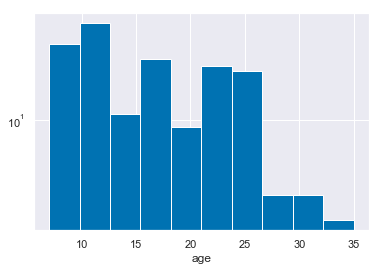

count    183.000000
mean      15.797814
std        6.560588
min        7.000000
25%       10.000000
50%       15.000000
75%       22.000000
max       35.000000
Name: Age, dtype: float64

In [53]:
age_bh = disemb_bh.Age
fig, ax = plt.subplots()    
ax.hist(age_bh, log=True)
ax.set_xlabel('age')
plt.show()

age_bh.describe()

The graph here is different from the ones we've seen so far. The average is lower than the general, showing that the majority of ships were composed of adolescents. There're no records here of babies (but of children yes), nor of the elderly. The maximum age is 35 years.

Comparing the number of redemptions per year in Bahamas with the general:

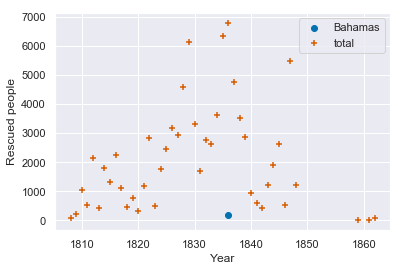

In [56]:
arrivalbh = pd.DataFrame(disemb_bh.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalbh = arrivalbh.rename(columns={'index': 'Year', 'Arrival': 
    'Rescued people'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Year', y='Rescued people', data=arrivalbh)  
ax.scatter(x='Year', y='Rescued people', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Year')
ax.set_ylabel('Rescued people')
ax.legend(labels=['Bahamas', 'total'])

plt.show()  

As expected, since there are few records of landed in the Bahamas compared to the general, the number of rescued people is low, having recorded only around the mid-1830s.

Now, let's go to the records showing the rescued people's embarkation locations who landed in the Bahamas:

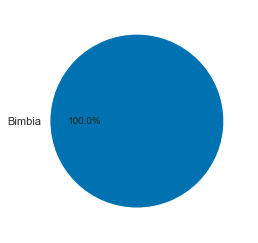

others      0
Bimbia    183
dtype: int64


In [57]:
embbh0 = disemb_bh['Embarkation'].value_counts()

embbh1 = pd.Series(embbh0[:7])
embbh2 = {'others': sum(embbh0[7:])}
embbh2 = pd.Series(embbh2, index=['others'])
embbh = pd.concat((embbh2, embbh1))

embbh_d = dict(embbh.sort_values())
embbh_d = {x:y for x, y in embbh_d.items() if y != 0} 
embbh_dkeys, embbh_dvalues = zip(*embbh_d.items())

fig, ax = plt.subplots()
ax.pie(embbh_dvalues, labels=embbh_dkeys, autopct='%1.1f%%', counterclock=False)
plt.show()
    
print(embbh)

All those landed in Bahamas embarked on Bimbia. From here, we can conjecture the following: would it be related to the ethnic or geographical origin of this segment?

**Kingston, Jamaica**

We're going to the rescued people who disembarked in this place, starting with their ethnic or geographical origin.

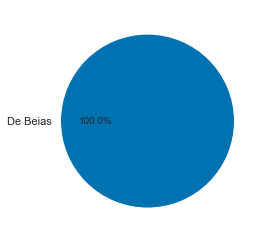

De Beias         144
Congo Cuma         0
Congo Cumi         0
Congo Cuno         0
Congo Cusa         0
Congo Cutuide      0
Congo Damba        0
Congo Danval       0
Congo Cay          0
unknown            0
others             0
dtype: int64


In [58]:
disemb_jm = file[file.Disembarkation == 'Kingston, Jamaica']
originjm0 = disemb_jm['Country of Origin'].value_counts()

originjm1 = pd.Series(originjm0[:10])
originjm2 = {'others': sum(originjm0[10:])}
originjm2 = pd.Series(originjm2, index=['others'])
originjm = pd.concat((originjm2, originjm1)).sort_values(ascending=False)

originjm_d = dict(originjm)
originjm_d = {x:y for x, y in originjm_d.items() if y != 0}
originjm_dkeys, originjm_dvalues = zip(*originjm_d.items())

fig, ax = plt.subplots()
ax.pie(originjm_dvalues, labels=originjm_dkeys, autopct='%1.1f%%')
plt.show()

print(originjm)

All have an ethnic or geographical origin in *De Beias*.

Let's go to the gender:

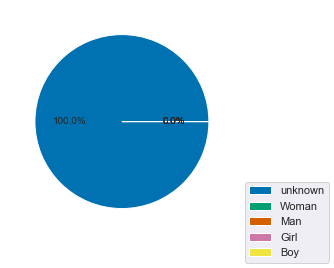

unknown    144
Woman        0
Man          0
Girl         0
Boy          0
Name: Sexage, dtype: int64


In [59]:
sexage_jm = disemb_jm.Sexage.value_counts()
sexagejm_d = dict(sexage_jm)
sexagejm_dkeys, sexagejm_dvalues = zip(*sexagejm_d.items())

fig, ax = plt.subplots()
ax.pie(sexagejm_dvalues, autopct='%1.1f%%')
fig.legend(sexagejm_dkeys, loc=4)
plt.show()

print(sexage_jm)

Unfortunately in Kingston we also have no information about the rescued people's gender. What about the age group?

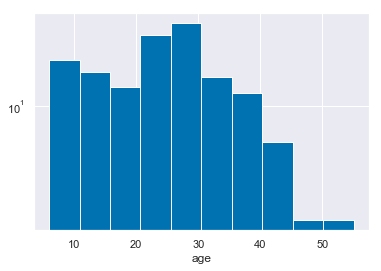

count    144.000000
mean      24.618055
std       10.903901
min        6.000000
25%       16.000000
50%       25.000000
75%       31.250000
max       55.000000
Name: Age, dtype: float64

In [60]:
age_jm = disemb_jm.Age

fig, ax = plt.subplots()    
ax.hist(age_jm, log=True)
ax.set_xlabel('age')
plt.show()

age_jm.describe()

Here the average age is also different from the general, this time between 24 and 25 years old.

About the comparison of the rescued people in Kingston, Jamaica and the general is as follows:

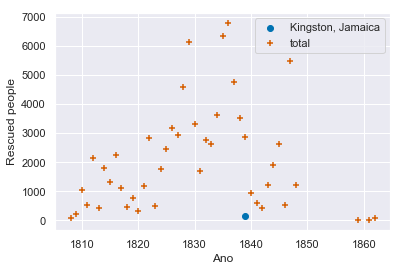

In [61]:
arrivaljm = pd.DataFrame(disemb_jm.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivaljm = arrivaljm.rename(columns={'index': 'Year', 'Arrival': 
    'Rescued people'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Year', y='Rescued people', data=arrivaljm)  
ax.scatter(x='Year', y='Rescued people', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Ano')
ax.set_ylabel('Rescued people')
ax.legend(labels=['Kingston, Jamaica', 'total'])

plt.show() 

Few rescues as we expected and around the end of the 1830s.

About boarding locations:

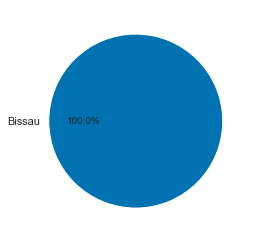

Bissau    144
others      0
dtype: int64


In [62]:
embjm0 = disemb_jm['Embarkation'].value_counts()

embjm1 = pd.Series(embjm0[:7])
embjm2 = {'others': sum(embjm0[7:])}
embjm2 = pd.Series(embjm2, index=['others'])
embjm = pd.concat((embjm2, embjm1)).sort_values(ascending=False)

embjm_d = dict(embjm)
embjm_d = {x:y for x, y in embjm_d.items() if y != 0} 
embjm_dkeys, embjm_dvalues = zip(*embjm_d.items())

fig, ax = plt.subplots()
ax.pie(embjm_dvalues, labels=embjm_dkeys, autopct='%1.1f%%', counterclock=False)
plt.show()
    
print(embjm)

All embarked in Bissau and the same conjecture: is it related to ethnic or geographical origin?

**St. Helena**

Let's look at the last place where the rescued people were landed, starting with their ethnic or geographical origin:

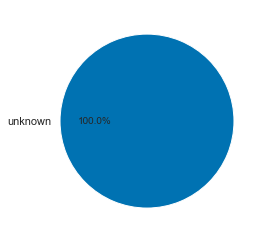

unknown          96
Congo Densuco     0
Congo Conche      0
Congo Cumi        0
Congo Cuno        0
Congo Cusa        0
Congo Cutuide     0
Congo Damba       0
Congo Danval      0
Congo Cuma        0
others            0
dtype: int64


In [63]:
disemb_hl = file[file.Disembarkation == 'St. Helena']
originhl0 = disemb_hl['Country of Origin'].value_counts()

originhl1 = pd.Series(originhl0[:10])
originhl2 = {'others': sum(originhl0[10:])}
originhl2 = pd.Series(originhl2, index=['others'])
originhl = pd.concat((originhl2, originhl1)).sort_values(ascending=False)

originhl_d = dict(originhl)
originhl_d = {x: y for x, y in originhl_d.items() if y!= 0}
originhl_dkeys, originhl_dvalues = zip(*originhl_d.items())

fig, ax = plt.subplots()
ax.pie(originhl_dvalues, labels=originhl_dkeys, autopct='%1.1f%%')
plt.show()

print(originhl)

There are no records. Now for the gender:

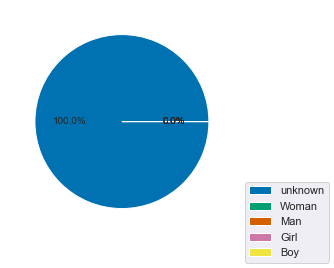

unknown    96
Woman       0
Man         0
Girl        0
Boy         0
Name: Sexage, dtype: int64


In [64]:
sexage_hl = disemb_hl.Sexage.value_counts()
sexagehl_d = dict(sexage_hl)
sexagehl_dkeys, sexagehl_dvalues = zip(*sexagehl_d.items())

fig, ax = plt.subplots()
ax.pie(sexagehl_dvalues, autopct='%1.1f%%')
fig.legend(sexagehl_dkeys, loc=4)
plt.show()

print(sexage_hl)

Also unknown. Age range:

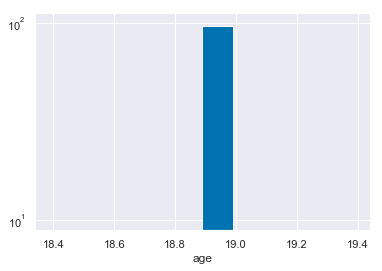

count    96.000000
mean     18.889683
std       0.000019
min      18.889702
25%      18.889702
50%      18.889702
75%      18.889702
max      18.889702
Name: Age, dtype: float64

In [65]:
age_hl = disemb_hl.Age
fig, ax = plt.subplots()    
ax.hist(age_hl, log=True)
ax.set_xlabel('age')
plt.show()

age_hl.describe()

This plot is weird. But do you remember that in place of NaN records we filled in with the average age? Taking this into account and noting that the average is exactly equal to the general average, as well as the minimum and maximum ages, as well as the quartiles, we can conclude that the data regarding the age group are also unknown.

Comparing the rescues in St. Helena with the general one:

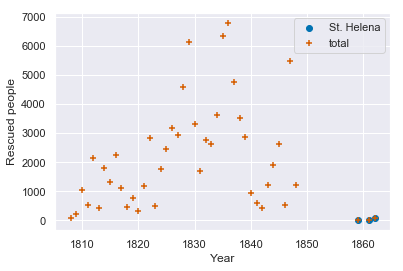

In [66]:
arrivalhl = pd.DataFrame(disemb_hl.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalhl = arrivalhl.rename(columns={'index': 'Year', 'Arrival': 
    'Rescued people'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Year', y='Rescued people', data=arrivalhl)  
ax.scatter(x='Year', y='Rescued people', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Year')
ax.set_ylabel('Rescued people')
ax.legend(labels=['St. Helena', 'total'])

plt.show() 

St. Helena is an outlier, as records show that rescues took place outside the most frequent period, between the late 1850s and part of the 1860s. And in this period, there're no records of other redemptions, at least in the database. It would be interesting to find out why.

Almost finishing, let's go to the last analysis referring to St. Helena: places of embarkation of the rescued.
  

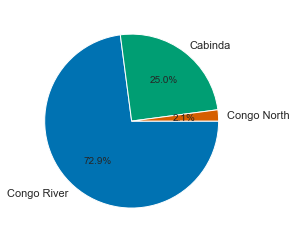

Congo River    70
Cabinda        24
Congo North     2
others          0
dtype: int64


In [68]:
embhl0 = disemb_hl['Embarkation'].value_counts()

embhl1 = pd.Series(embhl0[:7])
embhl2 = {'others': sum(embhl0[7:])}
embhl2 = pd.Series(embhl2, index=['others'])
embhl = pd.concat((embhl2, embhl1)).sort_values(ascending=False)

embhl_d = dict(embhl)
embhl_d = {x:y for x, y in embhl_d.items() if y != 0} 
embhl_dkeys, embhl_dvalues = zip(*embhl_d.items())

fig, ax = plt.subplots()
ax.pie(embhl_dvalues, labels=embhl_dkeys, autopct='%1.1f%%', counterclock=False)
plt.show()
    
print(embhl)

Those landed in St. Helena embarked from only 3 locations: Rio Congo, Cabinda and Congo do Norte (free translation).

Finally, finalizing the analysis of this database, we'll have an overview of the amount of redemptions per year in Freetown, Havana, Bahamas, Kingston and Saint Helena.

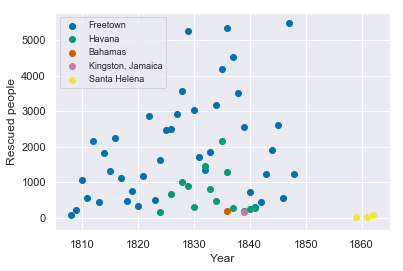

In [69]:
fig, ax = plt.subplots()  
ax.scatter(x='Year', y='Rescued people', data=arrivalft)
ax.scatter(x='Year', y='Rescued people', data=arrivalhv)
ax.scatter(x='Year', y='Rescued people', data=arrivalbh)
ax.scatter(x='Year', y='Rescued people', data=arrivaljm)
ax.scatter(x='Year', y='Rescued people', data=arrivalhl)
ax.set_xlabel('Year')
ax.set_ylabel('Rescued people')
ax.legend(labels=['Freetown', 'Havana', 'Bahamas', 
                  'Kingston, Jamaica', 'Santa Helena'], 
                  loc='upper left', fontsize=9)

plt.show() 

Many other information and relationships can be extracted from this database. I look forward to further analyzes, even deeper ones, of this database.

And this is my simple tribute to those who will never be forgotten!